<a href="https://colab.research.google.com/github/RChandana/ZeotapAssignment/blob/main/HariChandana_R_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [27]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge Customers and Transactions
data = transactions.merge(customers, on='CustomerID')

In [28]:
# Feature engineering
data['Recency'] = (pd.to_datetime('2025-01-12') - pd.to_datetime(data['TransactionDate'])).dt.days
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Number of transactions
    'Recency': 'min'  # Days since last transaction
}).rename(columns={'TransactionID': 'TransactionCount'})

In [29]:
# Add profile data
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [30]:
# Encoding and scaling
customer_features_encoded = pd.get_dummies(customer_features, columns=['Region'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features_encoded.drop(columns=['CustomerID']))

In [31]:
# Clustering
db_scores = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, cluster_labels)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

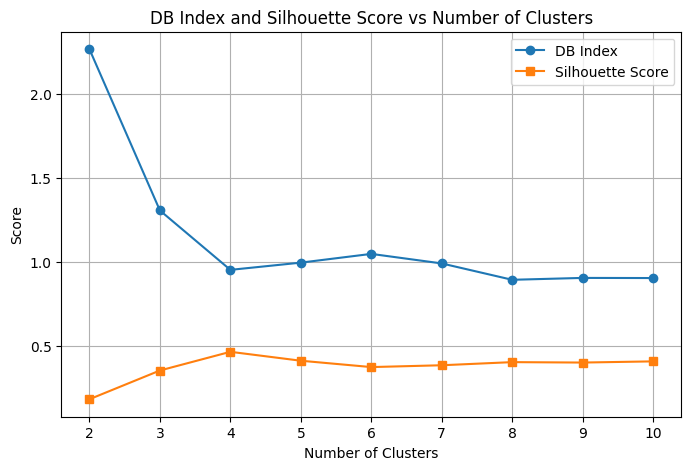

In [32]:
# Plot DB Index
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, marker='o', label='DB Index')
plt.plot(range(2, 11), silhouette_scores, marker='s', label='Silhouette Score')
plt.title('DB Index and Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(range(2, 11))
plt.legend()
plt.grid()
plt.show()

In [33]:
# Optimal number of clusters
optimal_clusters = 2 + np.argmin(db_scores)  # Find best cluster count
print(f'Optimal Number of Clusters: {optimal_clusters}')

Optimal Number of Clusters: 8


In [34]:
# Final Clustering and Visualization
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

In [35]:
# Add cluster labels to the data
customer_features['Cluster'] = final_labels

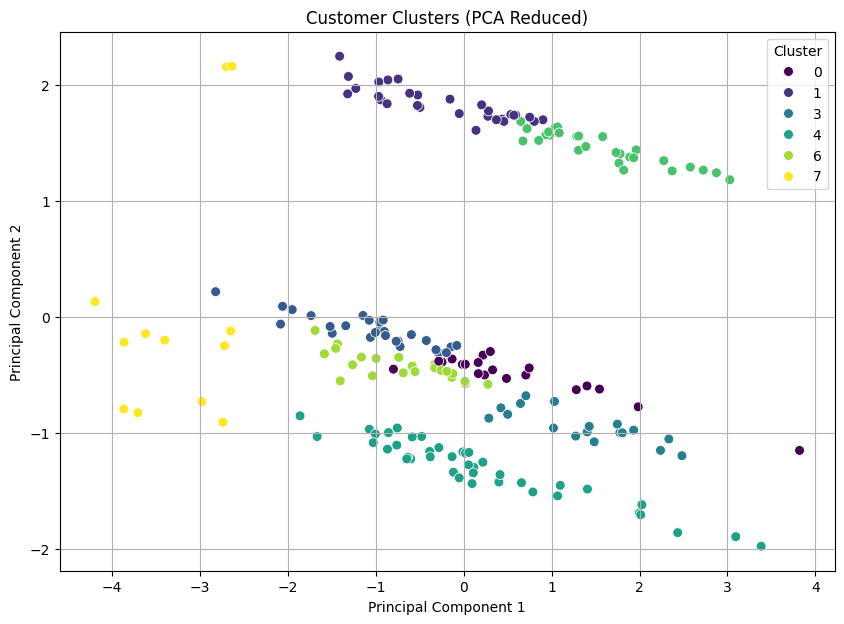

In [36]:
# Visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=final_labels, palette='viridis', s=50)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [40]:
# Save the clustered data
customer_features.to_csv('HariChandana_R_Clustered.csv', index=False)

In [42]:
from mpl_toolkits.mplot3d import Axes3D

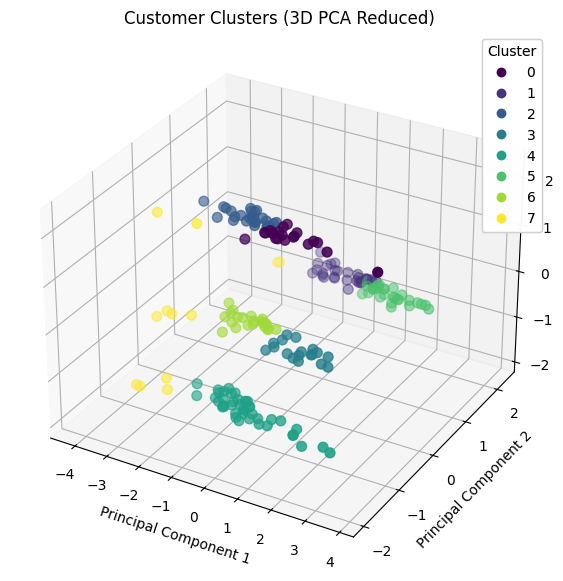

In [43]:
# 3D Visualization using PCA
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(scaled_data)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=final_labels, cmap='viridis', s=50)
ax.set_title('Customer Clusters (3D PCA Reduced)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)
plt.show()

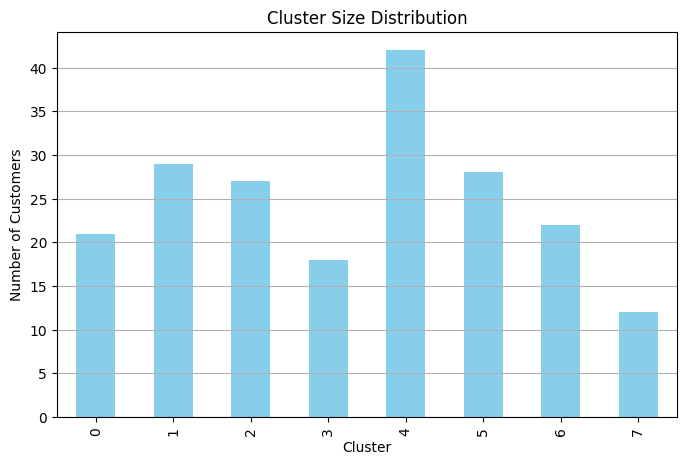

In [44]:
# Cluster size distribution
plt.figure(figsize=(8, 5))
customer_features['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [45]:
# Save the clustered data
customer_features.to_csv('HariChandana_R_Clustered.csv', index=False)

In [46]:
# Output clustering metrics
final_db_index = davies_bouldin_score(scaled_data, final_labels)
final_silhouette_score = silhouette_score(scaled_data, final_labels)
print(f'Final DB Index: {final_db_index}')
print(f'Final Silhouette Score: {final_silhouette_score}')
print(f'Number of Clusters Formed: {optimal_clusters}')

Final DB Index: 0.8916423498121121
Final Silhouette Score: 0.4012627899999537
Number of Clusters Formed: 8
